In [57]:
import pickle
import matplotlib.pyplot as plt
import sys
import os
import pandas as pd

sys.path.append("../")
from utils.preprocessing import *

### predict using the model

In [58]:
[features, scaled_features] = np.load('../processed_data/features_video_exp_16.npy', allow_pickle=True)
with open('Z:/hsu/output/comprehensive_behavior_model.pkl', 'rb') as fr:
    model = pickle.load(fr)
predictions = model.predict(features)

In [59]:
behavior_nonest_cats = ['torso_groom', 'investigate_0', 'unsure_0', 'wall_rear_0', 'rear_0',
                        'unsure_2', 'rear', 'investigate_1', 'investigate_2', 'right_itch',
                        'investigate_3', 'sleep_scrunch_0', 'sleep_scrunch_1', 'wall_rear_1', 'right_body_groom',
                        'face_groom_1', 'dive_scrunch', 'head_groom', 'left_orient', 'left_investigate',
                        'face_groom_2', 'left_body groom', 'left_itch_1', 'left_itch_2', 'face_groom_3',
                        'paw_groom', 'locomotion', 'right_forepaw_orient', 'right_orient']

len(behavior_nonest_cats), model.n_classes_

(29, 29)

In [60]:
behavior_nonest_cats.index('face_groom_1')

15

In [61]:
behavior_nonest_merged = [6, 7, 8, 9, 10, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28]
len(behavior_nonest_merged)

16

In [62]:
total_counts = {key:  [] for key in [behavior_nonest_cats[j] 
                                     for j in behavior_nonest_merged]}

for i in behavior_nonest_merged:
    total_counts[behavior_nonest_cats[i]] = len(np.where(predictions==i)[0])

In [63]:
df_counts_100ms = pd.DataFrame(total_counts, index=[0])
df_counts_100ms.to_csv('../test_behavior_counts.csv', index=None)

In [64]:
%store -r save_path
# Check if save_path is defined
if save_path:
    filename = os.path.join(save_path, 'test_behavior_counts.csv')
    df_counts_100ms.to_csv(filename, index=None)
    print(f'Saved the CSV file to {filename}')
else:
    print("Variable 'save_path' is not defined.")

Saved the CSV file to Z:/KayCei/AD13-D2/VIDEOS/072523-locomotion sham\test_behavior_counts.csv


In [65]:
total_loco = len(np.where(predictions==behavior_nonest_cats.index('locomotion'))[0])
total_contra = len(np.where(predictions==behavior_nonest_cats.index('contra_orient'))[0])

ValueError: 'contra_orient' is not in list

In [66]:
comp_loco_contra = [total_loco, total_contra]
plt.bar(np.arange(len(comp_loco_contra)), comp_loco_contra)

NameError: name 'total_contra' is not defined

### place side-by-side to visualize pattern

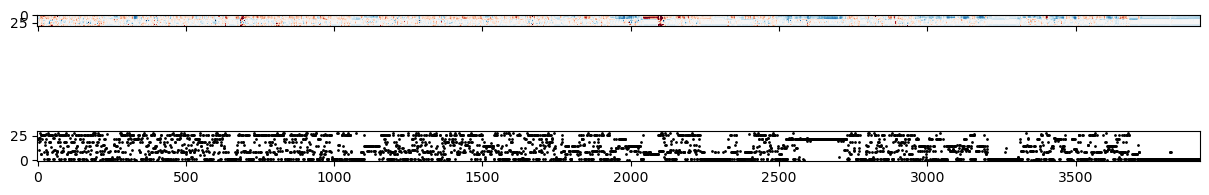

In [67]:
# plot scaled features with the corresponding predictions
fig, ax = plt.subplots(2, 1, figsize=(15, 3), gridspec_kw={'height_ratios': [6, 1]}, sharex=True)
# first 30 seconds
ax[0].imshow(scaled_features.T[:, ::10], vmin=-2, vmax=2, cmap='RdBu_r')
ax[1].scatter(np.arange(len(predictions[::10])), predictions[::10], s=1, color='k')
plt.show()

In [68]:
predictions[:50]

array([21, 19, 21, 21, 19, 21, 21, 21, 19, 21, 21, 21, 21, 21, 21, 21, 21,
       21, 21, 21, 21, 21, 19, 23, 10, 10, 10, 18, 10, 10, 10, 23, 23,  8,
       26, 18, 18, 21, 21, 22, 18, 26, 26, 18, 21, 21, 21, 21, 21, 23],
      dtype=int64)

In [69]:
idx_start = np.where(np.diff(predictions)!=0)[0]+1
np.unique([predictions[id_start] for id_start in idx_start], return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28], dtype=int64),
 array([ 345, 2076,   37,  174,   11,   22,  583,   12, 1274, 1514,  274,
         176,  428,   72,  986,  356,  131,   50, 1077,  152,  898,  252,
         136,    4,    1, 1719,  162,  847], dtype=int64))

### Save processed file

In [70]:
np.save('../processed_data/predict_video_2.npy', predictions)

In [71]:
%store -r save_path
np.save(os.path.join(save_path, 'predict_video_exp_16.npy'), predictions)

In [72]:
stim_on = 3
# in seconds, when did the animal perform behavior 2
behavior_times = np.where(predictions==stim_on)[0]/10
behavior_times

array([   8.9,   52.2,   66.6,  148.3,  153.9,  154.1,  166.5,  195.7,
        197. ,  197.6,  197.7,  251.2,  251.3,  251.5,  251.6,  251.7,
        251.8,  251.9,  252. ,  252.1,  252.2,  252.4,  252.5,  252.6,
        252.7,  252.8,  254.4,  254.5,  260.1,  263.6,  264.2,  264.6,
        267.3,  267.7,  267.8,  268. ,  269.8,  270.5,  270.6,  272.5,
        272.6,  272.7,  272.8,  272.9,  273. ,  273.1,  273.2,  273.3,
        273.4,  273.5,  273.6,  273.7,  273.8,  309.1,  329.6,  330.6,
        330.7,  351.2,  366.9,  367. ,  367.7,  367.8,  368.1,  368.2,
        368.3,  368.4,  368.5,  368.6,  395.7,  395.8,  395.9,  407.3,
        407.8,  408. ,  430.1,  431.3,  431.8,  432.9,  446.9,  447.4,
        456.5,  494.5,  494.6,  517. ,  519. ,  535.5,  535.6,  535.7,
        535.8,  535.9,  599.4,  609.9,  610.4,  683. ,  695.4,  695.6,
        695.7,  695.8,  698.6,  734.3,  734.4,  734.5,  734.6,  734.7,
        734.8,  734.9,  735. ,  737.4,  737.5,  737.6,  737.7,  737.8,
      

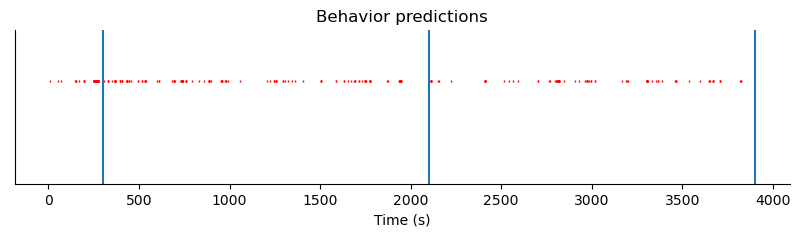

In [73]:
fig, ax = plt.subplots(1, 1, figsize=(10, 2))
# ax.plot(onset_times,
#         np.ones_like(onset_times),
#         ls='', marker='|', markersize=1, c='k', alpha=1)
ax.plot(behavior_times,
        np.ones_like(behavior_times)+0.5,
        ls='', marker='|', markersize=1, c='r', alpha=1)
ax.set_yticks([])
ax.vlines(5*60, 0.5, 2)
ax.vlines(35*60, 0.5, 2)
ax.vlines(65*60, 0.5, 2)
ax.set_ylim([0.5, 2])

# ax.set_xlim([50, 100])
ax.set_title('Behavior predictions')
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Time (s)')
plt.show()